# Praca domowa 6

## Zadanie 1


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/MI2-Education/2023L-ExploratoryDataAnalysis/main/homeworks/hw6/house_data.csv'
df = pd.read_csv(url)

1. Jaka jest średnia cena nieruchomości położonych nad wodą, których jakoś wykończenia jest równa lub większa od mediany jakości wykończenia?


In [ ]:
med = df['grade'].median()
w1 = df[(df['waterfront'] == 1) & (df['grade'] >= med)]
mn = w1['price'].mean()
mn

1784151.7006802722

Odp: 1784151.70

2. Czy nieruchomości o 2 piętrach mają większą (w oparciu o wartości mediany) liczbę łazienek niż nieruchomości o 3 piętrach?


In [ ]:
df2_1 = df[df['floors'] == 2]
bath1 = df2_1['bathrooms'].median()
df2_2 = df[df['floors'] == 3]
bath2 = df2_2['bathrooms'].median()

bath1 > bath2

False

Odp: Nie

3. Jak wygląda wartość kwartyla 0.25 oraz 0.75 jakości wykończenia nieruchomości położonych na północy biorąc pod uwagę czy ma ona widok na wodę czy nie ma?

In [11]:
midlat = (df['lat'].max()+df['lat'].min())/2
dfnorth = df[df['lat'] > midlat]
dfnorth1 = dfnorth[dfnorth['waterfront'] == 1]
q1 = dfnorth1['grade'].quantile(0.25)
q2 = dfnorth1['grade'].quantile(0.75)
dfnorth0 = dfnorth[dfnorth['waterfront'] == 0]
q3 = dfnorth0['grade'].quantile(0.25)
q4 = dfnorth0['grade'].quantile(0.75)
[q1, q2, q3, q4]

[8.0, 10.0, 7.0, 8.0]

Odp: 
*   Kwartyl 0.25 z widokiem na wodę: 8
*   Kwartyl 0.75 z widokiem na wodę: 10
*   Kwartyl 0.25 bez widoku na wodę: 7
*   Kwartyl 0.75 bez widoku na wodę: 8

4. Pod którym kodem pocztowy jest położonych najwięcej nieruchomości i jaki jest rozstęp miedzykwartylowy dla ceny nieruchomości położonych pod tym adresem?

In [44]:
df4_1 = df.groupby('zipcode').count()
df4_1.sort_values('id', ascending=False)

df4_2 = df[df['zipcode'] == 98103]
df4_2['price'].quantile(0.75) - df4_2['price'].quantile(0.25)

262875.0

Odp: Kod: 98103; IQR: 262875

5. Ile procent nieruchomości ma wyższą średnią powierzchnię 15 najbliższych sąsiadów względem swojej powierzchni?

In [ ]:
df.sqft_lot15[df.sqft_lot15 > df.sqft_lot].count()/df.sqft_lot15.count()*100

39.513255910794435

Odp: 39.51%

 6. O ile procent więcej jest nieruchomości leżcych na północy zachód niż  nieruchomości leżących na południowy wschód?

In [32]:
midlong = (df['long'].max()+df['long'].min())/2
dfNW = df[(df['lat'] > midlat) & (df['long'] < midlong)]
dfSE = df[(df['lat'] < midlat) & (df['long'] > midlong)]
abs(dfNW['id'].count() - dfSE['id'].count())/dfSE['id'].count()*100

18343.529411764706

Odp: 18343.53%

# Zadanie 2

Dla wybranej zmiennej ze zbioru danych z Zadania 1 narysuj:

a) rozkład zmiennej jakościowej

b) rozkład zmiennej ilościowej

c) rozkład dwóch zmiennych (dowolna kombinacja jakościowej i ilościowej)

a)

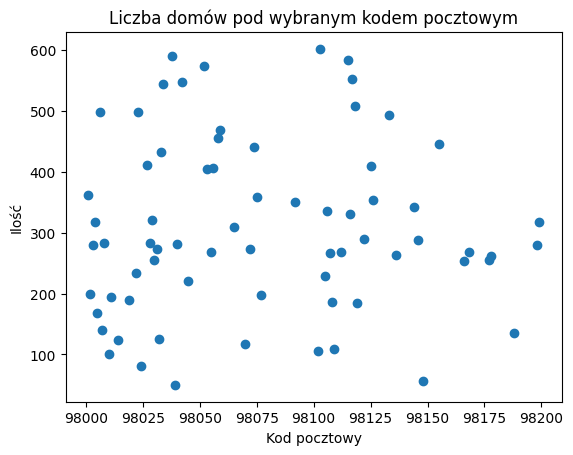

In [90]:
dfw1 = df.groupby('zipcode').count()
dfw1.reset_index(inplace=True)
plt.scatter(dfw1['zipcode'], dfw1['id'])
plt.title("Liczba domów pod wybranym kodem pocztowym")
plt.xlabel("Kod pocztowy")
plt.ylabel("Ilość")
plt.show()

b)

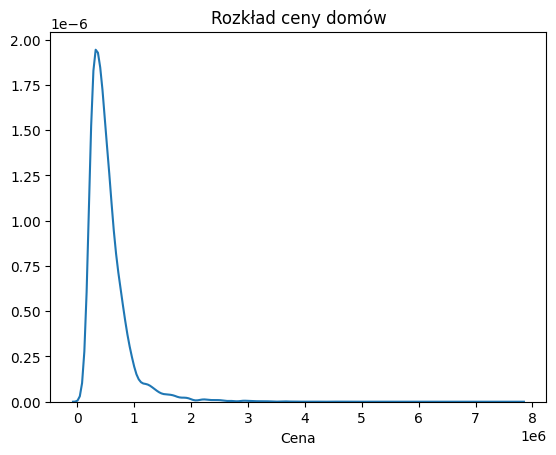

In [93]:
sns.kdeplot(df['price'])
plt.title("Rozkład ceny domów")
plt.xlabel("Cena")
plt.ylabel("")
plt.show()

c)

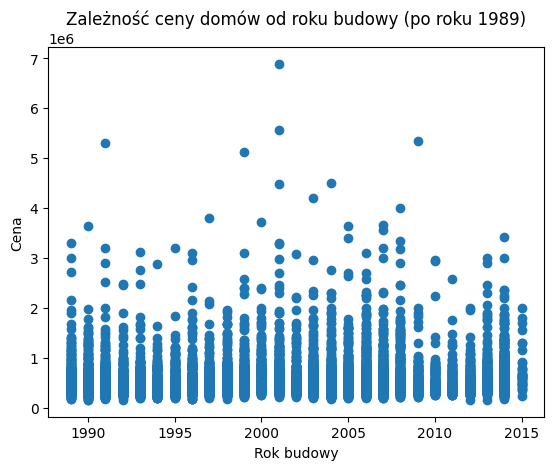

In [97]:
dfw3 = df[['yr_built', 'price']]
dfw3 = dfw3[dfw3['yr_built'] >= 1989]
dfw3.sort_values('yr_built')
plt.scatter(dfw3['yr_built'], dfw3['price'])
plt.title("Zależność ceny domów od roku budowy (po roku 1989)")
plt.xlabel("Rok budowy")
plt.ylabel("Cena")
plt.show()